<a href="https://colab.research.google.com/github/AshRK1997/Dog_vs_cat_image_recognition/blob/master/dogvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
id = '1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm'

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('CATS_DOGS.zip')


In [3]:
!unzip CATS_DOGS.zip

Streaming output truncated to the last 5000 lines.
  inflating: CATS_DOGS/train/DOG/4935.jpg  
  inflating: CATS_DOGS/train/DOG/4936.jpg  
  inflating: CATS_DOGS/train/DOG/4937.jpg  
  inflating: CATS_DOGS/train/DOG/4938.jpg  
  inflating: CATS_DOGS/train/DOG/4939.jpg  
  inflating: CATS_DOGS/train/DOG/494.jpg  
  inflating: CATS_DOGS/train/DOG/4940.jpg  
  inflating: CATS_DOGS/train/DOG/4941.jpg  
  inflating: CATS_DOGS/train/DOG/4942.jpg  
  inflating: CATS_DOGS/train/DOG/4943.jpg  
  inflating: CATS_DOGS/train/DOG/4944.jpg  
  inflating: CATS_DOGS/train/DOG/4945.jpg  
  inflating: CATS_DOGS/train/DOG/4946.jpg  
  inflating: CATS_DOGS/train/DOG/4947.jpg  
  inflating: CATS_DOGS/train/DOG/4948.jpg  
  inflating: CATS_DOGS/train/DOG/4949.jpg  
  inflating: CATS_DOGS/train/DOG/495.jpg  
  inflating: CATS_DOGS/train/DOG/4950.jpg  
  inflating: CATS_DOGS/train/DOG/4951.jpg  
  inflating: CATS_DOGS/train/DOG/4952.jpg  
  inflating: CATS_DOGS/train/DOG/4953.jpg  
  inflating: CATS_DOGS/trai

In [8]:
import cv2
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, AveragePooling2D,LSTM
from keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

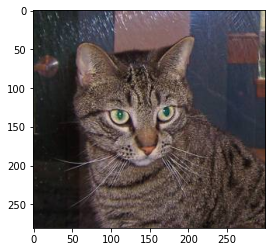

In [5]:
plt.imshow(cv2.cvtColor(cv2.imread(r'CATS_DOGS/train/CAT/1.jpg'),cv2.COLOR_BGR2RGB))

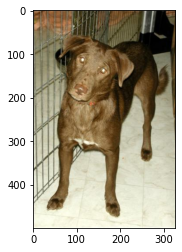

In [6]:
plt.imshow(cv2.cvtColor(cv2.imread(r'CATS_DOGS/train/DOG/1.jpg'),cv2.COLOR_BGR2RGB))

In [22]:
image_gen = ImageDataGenerator(rotation_range=50,width_shift_range=0.2,height_shift_range=0.2,
                               zoom_range=0.3,rescale=1/255,shear_range=0.2,horizontal_flip=True,
                               vertical_flip=True,fill_mode='nearest')

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(175,175,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3,seed=42))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2,seed=42))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.0005)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [23]:
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',(175,175),class_mode='binary')
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',(175,175),class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [24]:
result = model.fit_generator(train_image_gen, steps_per_epoch=250,epochs=100,verbose=1,use_multiprocessing=True,validation_data=test_image_gen,validation_steps=10)

Epoch 1/100
166/250 [==================>...........] - ETA: 31s - loss: 0.7037 - accuracy: 0.5352

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 90s 361ms/step - loss: 0.6992 - accuracy: 0.5419 - val_loss: 0.6838 - val_accuracy: 0.5719
Epoch 2/100
250/250 [==============================] - 83s 332ms/step - loss: 0.6786 - accuracy: 0.5688 - val_loss: 0.6850 - val_accuracy: 0.6313
Epoch 3/100
250/250 [==============================] - 81s 326ms/step - loss: 0.6640 - accuracy: 0.5997 - val_loss: 0.6348 - val_accuracy: 0.5281
Epoch 4/100
250/250 [==============================] - 79s 317ms/step - loss: 0.6559 - accuracy: 0.6169 - val_loss: 0.6585 - val_accuracy: 0.6562
Epoch 5/100
109/250 [============>.................] - ETA: 46s - loss: 0.6586 - accuracy: 0.6130

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

203/250 [=======================>......] - ETA: 15s - loss: 0.6439 - accuracy: 0.6327

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 80s 319ms/step - loss: 0.6388 - accuracy: 0.6389 - val_loss: 0.5561 - val_accuracy: 0.6719
Epoch 6/100
250/250 [==============================] - 79s 315ms/step - loss: 0.6223 - accuracy: 0.6549 - val_loss: 0.5947 - val_accuracy: 0.6781
Epoch 7/100
250/250 [==============================] - 79s 315ms/step - loss: 0.6218 - accuracy: 0.6549 - val_loss: 0.5761 - val_accuracy: 0.6687
Epoch 8/100
250/250 [==============================] - 79s 316ms/step - loss: 0.6105 - accuracy: 0.6715 - val_loss: 0.6288 - val_accuracy: 0.7250
Epoch 9/100
130/250 [==============>...............] - ETA: 38s - loss: 0.6026 - accuracy: 0.6663

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 78s 313ms/step - loss: 0.6041 - accuracy: 0.6681 - val_loss: 0.6511 - val_accuracy: 0.7063
Epoch 10/100
250/250 [==============================] - 78s 314ms/step - loss: 0.6027 - accuracy: 0.6739 - val_loss: 0.6535 - val_accuracy: 0.6500
Epoch 11/100
227/250 [==========================>...] - ETA: 7s - loss: 0.5890 - accuracy: 0.6898

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 317ms/step - loss: 0.5920 - accuracy: 0.6888 - val_loss: 0.6203 - val_accuracy: 0.6469
Epoch 12/100
250/250 [==============================] - 79s 317ms/step - loss: 0.5943 - accuracy: 0.6800 - val_loss: 0.5545 - val_accuracy: 0.7031
Epoch 13/100
 10/250 [>.............................] - ETA: 1:57 - loss: 0.5681 - accuracy: 0.6844

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 315ms/step - loss: 0.5917 - accuracy: 0.6866 - val_loss: 0.7862 - val_accuracy: 0.6094
Epoch 14/100
250/250 [==============================] - 79s 315ms/step - loss: 0.5873 - accuracy: 0.6894 - val_loss: 0.6154 - val_accuracy: 0.7281
Epoch 15/100
250/250 [==============================] - 79s 317ms/step - loss: 0.5838 - accuracy: 0.6955 - val_loss: 0.6038 - val_accuracy: 0.6969
Epoch 16/100
 37/250 [===>..........................] - ETA: 1:17 - loss: 0.5726 - accuracy: 0.7120

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 318ms/step - loss: 0.5787 - accuracy: 0.7017 - val_loss: 0.5544 - val_accuracy: 0.7531
Epoch 17/100
250/250 [==============================] - 80s 321ms/step - loss: 0.5658 - accuracy: 0.7090 - val_loss: 0.5002 - val_accuracy: 0.7531
Epoch 18/100
 78/250 [========>.....................] - ETA: 58s - loss: 0.5752 - accuracy: 0.7003

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 80s 319ms/step - loss: 0.5667 - accuracy: 0.7043 - val_loss: 0.6935 - val_accuracy: 0.6969
Epoch 19/100
250/250 [==============================] - 80s 318ms/step - loss: 0.5623 - accuracy: 0.7097 - val_loss: 0.6295 - val_accuracy: 0.7312
Epoch 20/100
215/250 [========================>.....] - ETA: 10s - loss: 0.5560 - accuracy: 0.7166

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 80s 320ms/step - loss: 0.5530 - accuracy: 0.7180 - val_loss: 0.4898 - val_accuracy: 0.7057
Epoch 21/100
250/250 [==============================] - 78s 311ms/step - loss: 0.5557 - accuracy: 0.7188 - val_loss: 0.5123 - val_accuracy: 0.7281
Epoch 22/100
105/250 [===========>..................] - ETA: 47s - loss: 0.5614 - accuracy: 0.7179

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 315ms/step - loss: 0.5554 - accuracy: 0.7153 - val_loss: 0.4532 - val_accuracy: 0.7531
Epoch 23/100
250/250 [==============================] - 79s 315ms/step - loss: 0.5477 - accuracy: 0.7230 - val_loss: 0.4036 - val_accuracy: 0.7875
Epoch 24/100
114/250 [============>.................] - ETA: 44s - loss: 0.5416 - accuracy: 0.7218

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 316ms/step - loss: 0.5362 - accuracy: 0.7293 - val_loss: 0.6093 - val_accuracy: 0.7375
Epoch 25/100
250/250 [==============================] - 79s 316ms/step - loss: 0.5439 - accuracy: 0.7254 - val_loss: 0.5200 - val_accuracy: 0.7312
Epoch 26/100
250/250 [==============================] - 79s 316ms/step - loss: 0.5337 - accuracy: 0.7324 - val_loss: 0.6698 - val_accuracy: 0.7188
Epoch 27/100
 42/250 [====>.........................] - ETA: 1:13 - loss: 0.5303 - accuracy: 0.7515

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 316ms/step - loss: 0.5278 - accuracy: 0.7408 - val_loss: 0.5260 - val_accuracy: 0.7188
Epoch 28/100
250/250 [==============================] - 79s 316ms/step - loss: 0.5126 - accuracy: 0.7481 - val_loss: 0.5315 - val_accuracy: 0.7750
Epoch 29/100
250/250 [==============================] - 80s 319ms/step - loss: 0.5150 - accuracy: 0.7437 - val_loss: 0.4010 - val_accuracy: 0.7344
Epoch 30/100
250/250 [==============================] - 79s 317ms/step - loss: 0.5129 - accuracy: 0.7499 - val_loss: 0.4589 - val_accuracy: 0.7781
Epoch 31/100
 42/250 [====>.........................] - ETA: 1:13 - loss: 0.5038 - accuracy: 0.7515

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 317ms/step - loss: 0.5040 - accuracy: 0.7541 - val_loss: 0.5350 - val_accuracy: 0.7719
Epoch 32/100
 92/250 [==========>...................] - ETA: 51s - loss: 0.4906 - accuracy: 0.7639

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 79s 314ms/step - loss: 0.5006 - accuracy: 0.7576 - val_loss: 0.4843 - val_accuracy: 0.7781
Epoch 33/100
250/250 [==============================] - 79s 314ms/step - loss: 0.4923 - accuracy: 0.7599 - val_loss: 0.6364 - val_accuracy: 0.7375
Epoch 34/100
250/250 [==============================] - 79s 314ms/step - loss: 0.4881 - accuracy: 0.7588 - val_loss: 0.4619 - val_accuracy: 0.7437
Epoch 35/100
  3/250 [..............................] - ETA: 1:45 - loss: 0.4967 - accuracy: 0.7292

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 78s 313ms/step - loss: 0.4940 - accuracy: 0.7632 - val_loss: 0.4149 - val_accuracy: 0.7375
Epoch 36/100
111/250 [============>.................] - ETA: 45s - loss: 0.4924 - accuracy: 0.7697

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 78s 314ms/step - loss: 0.4907 - accuracy: 0.7680 - val_loss: 0.4869 - val_accuracy: 0.7406
Epoch 37/100
250/250 [==============================] - 78s 313ms/step - loss: 0.4788 - accuracy: 0.7739 - val_loss: 0.4466 - val_accuracy: 0.7906
Epoch 38/100
250/250 [==============================] - 79s 315ms/step - loss: 0.4836 - accuracy: 0.7689 - val_loss: 0.5076 - val_accuracy: 0.7437
Epoch 39/100
250/250 [==============================] - 78s 312ms/step - loss: 0.4864 - accuracy: 0.7659 - val_loss: 0.3111 - val_accuracy: 0.8094
Epoch 40/100
 16/250 [>.............................] - ETA: 1:09 - loss: 0.4836 - accuracy: 0.7695

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 80s 321ms/step - loss: 0.4589 - accuracy: 0.7857 - val_loss: 0.3658 - val_accuracy: 0.8027
Epoch 41/100
108/250 [===========>..................] - ETA: 43s - loss: 0.4754 - accuracy: 0.7789

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 78s 312ms/step - loss: 0.4759 - accuracy: 0.7724 - val_loss: 0.3659 - val_accuracy: 0.8250
Epoch 42/100
250/250 [==============================] - 84s 335ms/step - loss: 0.4646 - accuracy: 0.7771 - val_loss: 0.4142 - val_accuracy: 0.7875
Epoch 43/100
220/250 [=========================>....] - ETA: 10s - loss: 0.4660 - accuracy: 0.7777

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 85s 341ms/step - loss: 0.4644 - accuracy: 0.7770 - val_loss: 0.3124 - val_accuracy: 0.8125
Epoch 44/100
250/250 [==============================] - 88s 352ms/step - loss: 0.4702 - accuracy: 0.7790 - val_loss: 0.3534 - val_accuracy: 0.7906
Epoch 45/100
229/250 [==========================>...] - ETA: 7s - loss: 0.4637 - accuracy: 0.7701

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 85s 338ms/step - loss: 0.4639 - accuracy: 0.7713 - val_loss: 0.4913 - val_accuracy: 0.8219
Epoch 46/100
250/250 [==============================] - 85s 339ms/step - loss: 0.4599 - accuracy: 0.7809 - val_loss: 0.4073 - val_accuracy: 0.8219
Epoch 47/100
250/250 [==============================] - 85s 340ms/step - loss: 0.4559 - accuracy: 0.7823 - val_loss: 0.4437 - val_accuracy: 0.7844
Epoch 48/100
 46/250 [====>.........................] - ETA: 1:16 - loss: 0.4366 - accuracy: 0.7989

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 85s 341ms/step - loss: 0.4427 - accuracy: 0.7978 - val_loss: 0.4627 - val_accuracy: 0.7844
Epoch 49/100
250/250 [==============================] - 86s 343ms/step - loss: 0.4529 - accuracy: 0.7837 - val_loss: 0.2891 - val_accuracy: 0.7625
Epoch 50/100
250/250 [==============================] - 86s 346ms/step - loss: 0.4334 - accuracy: 0.7987 - val_loss: 0.2656 - val_accuracy: 0.7937
Epoch 51/100
215/250 [========================>.....] - ETA: 12s - loss: 0.4558 - accuracy: 0.7847

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 347ms/step - loss: 0.4497 - accuracy: 0.7884 - val_loss: 0.7307 - val_accuracy: 0.8156
Epoch 52/100
250/250 [==============================] - 86s 346ms/step - loss: 0.4433 - accuracy: 0.7910 - val_loss: 0.3445 - val_accuracy: 0.8250
Epoch 53/100
169/250 [===================>..........] - ETA: 28s - loss: 0.4380 - accuracy: 0.7959

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 86s 345ms/step - loss: 0.4408 - accuracy: 0.7937 - val_loss: 0.4594 - val_accuracy: 0.7688
Epoch 54/100
250/250 [==============================] - 87s 346ms/step - loss: 0.4482 - accuracy: 0.7894 - val_loss: 0.3481 - val_accuracy: 0.8000
Epoch 55/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4407 - accuracy: 0.7931 - val_loss: 0.3957 - val_accuracy: 0.8219
Epoch 56/100
 99/250 [==========>...................] - ETA: 54s - loss: 0.4317 - accuracy: 0.8043

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 346ms/step - loss: 0.4323 - accuracy: 0.8006 - val_loss: 0.2718 - val_accuracy: 0.8000
Epoch 57/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4280 - accuracy: 0.7990 - val_loss: 0.3698 - val_accuracy: 0.8125
Epoch 58/100
100/250 [===========>..................] - ETA: 53s - loss: 0.4358 - accuracy: 0.7931

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 347ms/step - loss: 0.4279 - accuracy: 0.7985 - val_loss: 0.4803 - val_accuracy: 0.8156
Epoch 59/100
250/250 [==============================] - 88s 351ms/step - loss: 0.4416 - accuracy: 0.7999 - val_loss: 0.4107 - val_accuracy: 0.8328
Epoch 60/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4192 - accuracy: 0.8102 - val_loss: 0.2904 - val_accuracy: 0.8250
Epoch 61/100
 80/250 [========>.....................] - ETA: 1:02 - loss: 0.4321 - accuracy: 0.7953

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 349ms/step - loss: 0.4348 - accuracy: 0.7961 - val_loss: 0.4522 - val_accuracy: 0.8469
Epoch 62/100
185/250 [=====================>........] - ETA: 22s - loss: 0.4203 - accuracy: 0.8086

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 348ms/step - loss: 0.4170 - accuracy: 0.8070 - val_loss: 0.3968 - val_accuracy: 0.7969
Epoch 63/100
250/250 [==============================] - 87s 348ms/step - loss: 0.4200 - accuracy: 0.8080 - val_loss: 0.5058 - val_accuracy: 0.8406
Epoch 64/100
222/250 [=========================>....] - ETA: 9s - loss: 0.4082 - accuracy: 0.8129 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 349ms/step - loss: 0.4071 - accuracy: 0.8133 - val_loss: 0.2615 - val_accuracy: 0.8125
Epoch 65/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4203 - accuracy: 0.8105 - val_loss: 0.3367 - val_accuracy: 0.8094
Epoch 66/100
250/250 [==============================] - 87s 348ms/step - loss: 0.4192 - accuracy: 0.8072 - val_loss: 0.4499 - val_accuracy: 0.8344
Epoch 67/100
 37/250 [===>..........................] - ETA: 1:24 - loss: 0.4032 - accuracy: 0.8117

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 348ms/step - loss: 0.4147 - accuracy: 0.8075 - val_loss: 0.2738 - val_accuracy: 0.8000
Epoch 68/100
250/250 [==============================] - 87s 349ms/step - loss: 0.4132 - accuracy: 0.8092 - val_loss: 0.3355 - val_accuracy: 0.7937
Epoch 69/100
205/250 [=======================>......] - ETA: 15s - loss: 0.4262 - accuracy: 0.8009

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 86s 346ms/step - loss: 0.4210 - accuracy: 0.8069 - val_loss: 0.3095 - val_accuracy: 0.8438
Epoch 70/100
250/250 [==============================] - 87s 348ms/step - loss: 0.4095 - accuracy: 0.8136 - val_loss: 0.3772 - val_accuracy: 0.7719
Epoch 71/100
174/250 [===================>..........] - ETA: 26s - loss: 0.3933 - accuracy: 0.8261

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 350ms/step - loss: 0.3959 - accuracy: 0.8251 - val_loss: 0.4764 - val_accuracy: 0.8281
Epoch 72/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4024 - accuracy: 0.8207 - val_loss: 0.3633 - val_accuracy: 0.8438
Epoch 73/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3977 - accuracy: 0.8178 - val_loss: 0.5335 - val_accuracy: 0.8313
Epoch 74/100
166/250 [==================>...........] - ETA: 29s - loss: 0.4013 - accuracy: 0.8165

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 88s 350ms/step - loss: 0.4017 - accuracy: 0.8152 - val_loss: 0.4477 - val_accuracy: 0.8156
Epoch 75/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3978 - accuracy: 0.8173 - val_loss: 0.5228 - val_accuracy: 0.7781
Epoch 76/100
122/250 [=============>................] - ETA: 45s - loss: 0.4083 - accuracy: 0.8128

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 347ms/step - loss: 0.4039 - accuracy: 0.8140 - val_loss: 0.2983 - val_accuracy: 0.8500
Epoch 77/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3980 - accuracy: 0.8227 - val_loss: 0.4964 - val_accuracy: 0.8125
Epoch 78/100
250/250 [==============================] - 87s 348ms/step - loss: 0.4027 - accuracy: 0.8195 - val_loss: 0.3715 - val_accuracy: 0.8406
Epoch 79/100
114/250 [============>.................] - ETA: 46s - loss: 0.3967 - accuracy: 0.8173

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 88s 353ms/step - loss: 0.3897 - accuracy: 0.8187 - val_loss: 0.3509 - val_accuracy: 0.8060
Epoch 80/100
250/250 [==============================] - 85s 339ms/step - loss: 0.3906 - accuracy: 0.8183 - val_loss: 0.4470 - val_accuracy: 0.8062
Epoch 81/100
119/250 [=============>................] - ETA: 46s - loss: 0.4016 - accuracy: 0.8172

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 347ms/step - loss: 0.3953 - accuracy: 0.8201 - val_loss: 0.4333 - val_accuracy: 0.8344
Epoch 82/100
250/250 [==============================] - 87s 347ms/step - loss: 0.4007 - accuracy: 0.8168 - val_loss: 0.5706 - val_accuracy: 0.8469
Epoch 83/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3989 - accuracy: 0.8161 - val_loss: 0.4213 - val_accuracy: 0.8156
Epoch 84/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3755 - accuracy: 0.8361 - val_loss: 0.4644 - val_accuracy: 0.8375
Epoch 85/100
 76/250 [========>.....................] - ETA: 1:03 - loss: 0.3851 - accuracy: 0.8277

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 88s 351ms/step - loss: 0.3804 - accuracy: 0.8279 - val_loss: 0.3597 - val_accuracy: 0.8313
Epoch 86/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3842 - accuracy: 0.8267 - val_loss: 0.5746 - val_accuracy: 0.8250
Epoch 87/100
 94/250 [==========>...................] - ETA: 56s - loss: 0.3862 - accuracy: 0.8158

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

213/250 [========================>.....] - ETA: 12s - loss: 0.3832 - accuracy: 0.8272

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 348ms/step - loss: 0.3828 - accuracy: 0.8276 - val_loss: 0.2562 - val_accuracy: 0.8031
Epoch 88/100
250/250 [==============================] - 87s 348ms/step - loss: 0.3865 - accuracy: 0.8237 - val_loss: 0.3210 - val_accuracy: 0.8469
Epoch 89/100
250/250 [==============================] - 88s 351ms/step - loss: 0.3822 - accuracy: 0.8244 - val_loss: 0.2946 - val_accuracy: 0.8625
Epoch 90/100
250/250 [==============================] - 88s 350ms/step - loss: 0.3815 - accuracy: 0.8298 - val_loss: 0.3051 - val_accuracy: 0.8125
Epoch 91/100
231/250 [==========================>...] - ETA: 6s - loss: 0.3915 - accuracy: 0.8212

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

232/250 [==========================>...] - ETA: 6s - loss: 0.3916 - accuracy: 0.8213

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 48 bytes but only got 0. Skipping tag 532
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


250/250 [==============================] - 88s 350ms/step - loss: 0.3881 - accuracy: 0.8232 - val_loss: 0.4800 - val_accuracy: 0.8250
Epoch 92/100
250/250 [==============================] - 88s 351ms/step - loss: 0.3700 - accuracy: 0.8349 - val_loss: 0.2757 - val_accuracy: 0.8687
Epoch 93/100
223/250 [=========================>....] - ETA: 9s - loss: 0.3902 - accuracy: 0.8243

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 350ms/step - loss: 0.3905 - accuracy: 0.8243 - val_loss: 0.3664 - val_accuracy: 0.8438
Epoch 94/100
250/250 [==============================] - 88s 352ms/step - loss: 0.3841 - accuracy: 0.8312 - val_loss: 0.3243 - val_accuracy: 0.8406
Epoch 95/100
133/250 [==============>...............] - ETA: 42s - loss: 0.3673 - accuracy: 0.8318

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 88s 353ms/step - loss: 0.3740 - accuracy: 0.8326 - val_loss: 0.3019 - val_accuracy: 0.8406
Epoch 96/100
250/250 [==============================] - 89s 354ms/step - loss: 0.3677 - accuracy: 0.8375 - val_loss: 0.3653 - val_accuracy: 0.8313
Epoch 97/100
250/250 [==============================] - 88s 351ms/step - loss: 0.3593 - accuracy: 0.8378 - val_loss: 0.5433 - val_accuracy: 0.7750
Epoch 98/100
 33/250 [==>...........................] - ETA: 1:26 - loss: 0.3955 - accuracy: 0.8106

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

250/250 [==============================] - 87s 349ms/step - loss: 0.3721 - accuracy: 0.8342 - val_loss: 0.5326 - val_accuracy: 0.8595
Epoch 99/100
250/250 [==============================] - 89s 354ms/step - loss: 0.3709 - accuracy: 0.8336 - val_loss: 0.3630 - val_accuracy: 0.8531
Epoch 100/100
250/250 [==============================] - 88s 350ms/step - loss: 0.3647 - accuracy: 0.8364 - val_loss: 0.3348 - val_accuracy: 0.8062


In [25]:
model.save("model.h5")

In [30]:
import os
import numpy as np
from keras.preprocessing import image

path1 = 'CATS_DOGS/test/CAT' 
path2 = 'CATS_DOGS/test/DOG'   

listing = os.listdir(path1) 
listing1 = os.listdir(path2)

correct = 0
incorrect = 0
category = 0

for file in listing:
    dile = path1 + "/"+file
    img = image.load_img(dile, target_size=(175, 175))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    predict = model.predict_classes(img)
    if predict == category:
        correct=correct+1
    else: 
        incorrect=incorrect+1

    

category = 1

for file in listing1:
    dile = path2 + "/"+file
    img = image.load_img(dile, target_size=(175, 175))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    predict = model.predict_classes(img)
    if predict == category:
        correct=correct+1
    else: 
        incorrect=incorrect+1

In [31]:
print(correct,incorrect)
print("accuracy=",str(correct/(correct+incorrect)*100))

5177 1074
accuracy= 82.81874900015997
